## Cropped Too Soon Analysis
Ashley Ferreira, December 19

A notebook to do some pretty barebone analysis of the results outputted from cropped_too_soon.py 

Note that:
- batch 1 reffers to ISIS_101300030772 
- batch 2 reffers to ISIS_102000056114 before additional upload
- batch 2 addition reffers to the additonally uploaded data in to ISIS_102000056114
- batch 3 reffers to raw_upload_20230421

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
batch1_df = pd.read_csv('//SAQCJ3YWVDCP003.csa.space.gc.ca/L-DFS/DATA/ISIS/cropped_too_soon_detection_batch1/cropped_too_soon_results.csv')
batch2_df = pd.read_csv('//SAQCJ3YWVDCP003.csa.space.gc.ca/L-DFS/DATA/ISIS/cropped_too_soon_detection_batch2/cropped_too_soon_results.csv')
batch2_addition_df = pd.read_csv('//SAQCJ3YWVDCP003.csa.space.gc.ca/L-DFS/DATA/ISIS/cropped_too_soon_detection_batch2_addition/cropped_too_soon_results.csv')
batch3_df = pd.read_csv('//SAQCJ3YWVDCP003.csa.space.gc.ca/L-DFS/DATA/ISIS/cropped_too_soon_detection_batch3/cropped_too_soon_results.csv')

In [4]:
df_merged = pd.concat([batch1_df, batch2_df, batch2_addition_df, batch3_df])
df_merged.head()

,Directory,Subdirectory,filename,height,width,user,datetime
0,b24_R014207706,B1-35-4 ISIS A C-1346,Image0001.png,403,1358,aferreira,2023-12-13 00:15:30.168236
1,b24_R014207706,B1-35-4 ISIS A C-1346,Image0002.png,405,908,aferreira,2023-12-13 00:15:30.230966
2,b24_R014207706,B1-35-4 ISIS A C-1346,Image0003.png,403,724,aferreira,2023-12-13 00:15:30.284501
3,b24_R014207706,B1-35-4 ISIS A C-1346,Image0004.png,403,734,aferreira,2023-12-13 00:15:30.329558
4,b24_R014207706,B1-35-4 ISIS A C-1346,Image0005.png,403,754,aferreira,2023-12-13 00:15:30.363558


In [5]:
total_len = len(df_merged)
df_merged.drop_duplicates(subset=['Directory', 'Subdirectory', 'filename'], inplace=True) 
no_dup_len = len(df_merged)

print(f'total number of entries: {total_len}')
print(f'number of duplicates: {total_len - no_dup_len}') 
print(f'total number of entries with duplicates removed: {no_dup_len} (used from here on in)')

total number of entries: 1394454
number of duplicates: 4082
total number of entries with duplicates removed: 1390372 (used from here on in)


I guess these duplicates are still happening, will try to revisit and fix

In [6]:
error_rows = df_merged[df_merged['height'] == -1]
df_clean = df_merged[df_merged['height'] != -1]

# filter out the errors here since -1/-1 is just 1!
aspect_ratios = df_clean['width']/df_clean['height']

In [7]:
print(f'total number of entries with processing errors: {len(error_rows)}')
print(f'percent of entries with errors: {100*round(len(error_rows)/no_dup_len,5)}%')

total number of entries with processing errors: 479
percent of entries with errors: 0.034%


Not many processing errors which is awesome! Likely box 29 related stuff but have not looked into it...

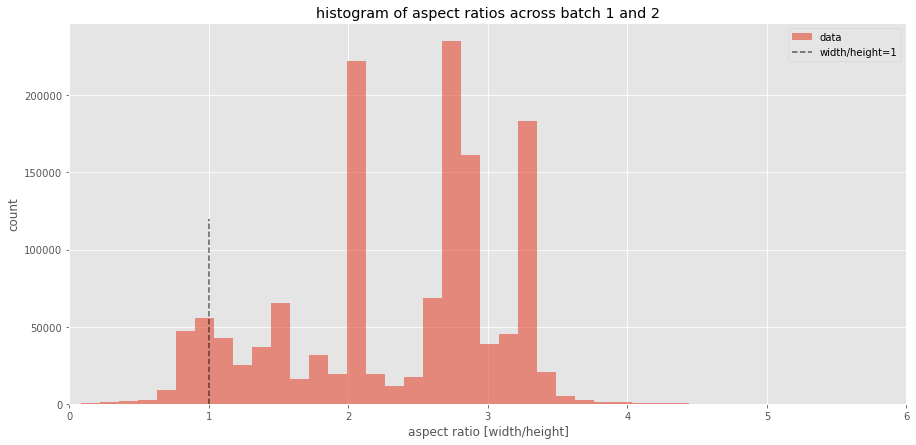

In [11]:
plt.figure(figsize=(15,7))
plt.hist(aspect_ratios, bins=1000, label='data', alpha=0.6)
plt.vlines(1, ymin=0, ymax=120000, linestyle='--', color='black', label='width/height=1', alpha=0.6)

plt.title('histogram of aspect ratios across batch 1 and 2')
plt.xlabel('aspect ratio [width/height]')
plt.ylabel('count')

plt.xlim(0, 6) # some stray long ionograms that I am cutting off
plt.legend()
plt.show()

In [10]:
short_aspect_ratios = aspect_ratios[aspect_ratios < 1]
print(f'number of valid entries with aspect ratio < 1: {len(short_aspect_ratios)}')
print(f'percent of valid entries with aspect ratio < 1: {100*round(len(short_aspect_ratios)/len(df_clean),3)}%')

number of valid entries with aspect ratio < 1: 104595
percent of valid entries with aspect ratio < 1: 7.5%
